In [43]:
# Pritam shrestha
# DSC550 - Data Mining
# Date: 07/08/2020
# Problem:1(Decision_Tree_for_max_depth_2_and_4)




import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import tree
import graphviz
import pydotplus
df1=pd.read_csv(r"C:\Users\pritam\Desktop\caesarian.csv")
df1

,age,delivery number,delivery time,blood pressure,heart problem,caesarian
0,22,1,0,2,0,0
1,26,2,0,1,0,1
2,26,2,1,1,0,0
3,28,1,0,2,0,0
4,22,2,0,1,0,1
...,...,...,...,...,...,...
75,27,2,1,1,0,0
76,33,4,0,1,0,1
77,29,2,1,2,0,1
78,25,1,2,0,0,1


In [2]:
# There is white space so lets rename the column
df1.columns=['age','delivery_number','delivery_time','blood_pressure','heart_problem','caesarian']


In [3]:
# checking shape
df1.shape

(80, 6)

In [4]:
# now lets check the missing valuse in the datasets
df1.isnull().any().sum()

0

In [5]:
# There is no missing values.So lets split the data into input and target variables.
input_v=df1.drop('caesarian',axis=1)
input_v.head()


,age,delivery_number,delivery_time,blood_pressure,heart_problem
0,22,1,0,2,0
1,26,2,0,1,0
2,26,2,1,1,0
3,28,1,0,2,0
4,22,2,0,1,0


In [6]:
# for target variable
target_v=df1['caesarian']
target_v.head()

0    0
1    1
2    0
3    0
4    1
Name: caesarian, dtype: int64

In [7]:
# splitting into train and test datasets
input_v_train,input_v_test,target_v_train,target_v_test=train_test_split(input_v,target_v,test_size=0.2,random_state=100)
model1=tree.DecisionTreeClassifier(criterion='entropy',random_state=80,max_depth=2,min_samples_leaf=5)
model1.fit(input_v_train,target_v_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=80, splitter='best')

In [8]:
# for prediction
y_predict=model1.predict(input_v_test)
y_predict

array([1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0], dtype=int64)

In [9]:
# for max_depth=4
model2=tree.DecisionTreeClassifier(criterion='entropy',random_state=80,max_depth=4,min_samples_leaf=5)
model2.fit(input_v_train,target_v_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=80, splitter='best')

In [10]:
y_predict1=model2.predict(input_v_test)
y_predict1

array([1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0], dtype=int64)

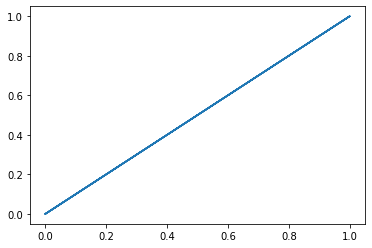

In [11]:
# plotting
def plot(x,y):
    plt.plot(x,y)
plot(y_predict,y_predict1)

Decision Tree Plot For Model DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=80, splitter='best')


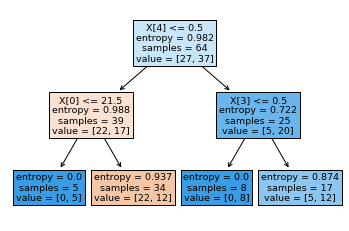

In [12]:
# plotting decision tree for max_depth=2
def plot(x):
    print("Decision Tree Plot For Model",x)
    tree.plot_tree(x,filled=True)
plot(model1)

Decision Tree Plot For Model DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=80, splitter='best')


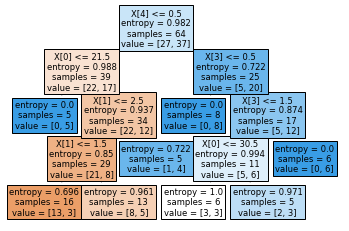

In [13]:
# plotting for max_depth=4
plot(model2)

In [14]:
# if we increase max_depth,training error will always go down or it allows the tree to grow too.